# 1: Data Cleaning & Preprocessing 

 # import the Python libraries

In [189]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, ttest_ind

# About Dataset

In [3]:
df_Employee = pd.read_csv("Employee.csv")
df_Employee.head()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,3012-1A41,Leonelle,Simco,Female,30,Some Travel,Sales,27,IL,White,...,Divorced,102059,1,No,2012-01-03,No,10,4,9,7
1,CBCB-9C9D,Leonerd,Aland,Male,38,Some Travel,Sales,23,CA,White,...,Single,157718,0,Yes,2012-01-04,No,10,6,10,0
2,95D7-1CE9,Ahmed,Sykes,Male,43,Some Travel,Human Resources,29,CA,Asian or Asian American,...,Married,309964,1,No,2012-01-04,No,10,6,10,8
3,47A0-559B,Ermentrude,Berrie,Non-Binary,39,Some Travel,Technology,12,IL,White,...,Married,293132,0,No,2012-01-05,No,10,10,10,0
4,42CC-040A,Stace,Savege,Female,29,Some Travel,Human Resources,29,CA,White,...,Single,49606,0,No,2012-01-05,Yes,6,1,1,6


In [4]:
df_Employee.tail()

,EmployeeID,FirstName,LastName,Gender,Age,BusinessTravel,Department,DistanceFromHome (KM),State,Ethnicity,...,MaritalStatus,Salary,StockOptionLevel,OverTime,HireDate,Attrition,YearsAtCompany,YearsInMostRecentRole,YearsSinceLastPromotion,YearsWithCurrManager
1465,467E-977A,Jud,Melanaphy,Male,20,Some Travel,Technology,28,CA,Black or African American,...,Single,38508,0,No,2022-12-26,No,0,0,0,0
1466,6FB9-A624,Marc,Calver,Non-Binary,27,Some Travel,Technology,8,CA,Black or African American,...,Single,92995,3,No,2022-12-30,No,0,0,0,0
1467,EBF4-5928,Rudolph,MacDearmont,Male,21,Some Travel,Sales,4,CA,Black or African American,...,Single,63375,0,No,2022-12-30,No,0,0,0,0
1468,60E6-B1D9,Merill,Agg,Male,21,Some Travel,Technology,7,CA,Black or African American,...,Married,46521,0,No,2022-12-30,No,0,0,0,0
1469,84D4-D4C3,Naoma,Hebbard,Female,20,No Travel,Technology,28,CA,Black or African American,...,Married,38258,0,No,2022-12-31,No,0,0,0,0


In [5]:
df_Employee.columns

Index(['EmployeeID', 'FirstName', 'LastName', 'Gender', 'Age',
       'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'State',
       'Ethnicity', 'Education', 'EducationField', 'JobRole', 'MaritalStatus',
       'Salary', 'StockOptionLevel', 'OverTime', 'HireDate', 'Attrition',
       'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion',
       'YearsWithCurrManager'],
      dtype='object')

In [6]:
df_Employee.shape

(1470, 23)

In [7]:
df_Employee.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1470 entries, 0 to 1469
Data columns (total 23 columns):
 #   Column                   Non-Null Count  Dtype 
---  ------                   --------------  ----- 
 0   EmployeeID               1470 non-null   object
 1   FirstName                1470 non-null   object
 2   LastName                 1470 non-null   object
 3   Gender                   1470 non-null   object
 4   Age                      1470 non-null   int64 
 5   BusinessTravel           1470 non-null   object
 6   Department               1470 non-null   object
 7   DistanceFromHome (KM)    1470 non-null   int64 
 8   State                    1470 non-null   object
 9   Ethnicity                1470 non-null   object
 10  Education                1470 non-null   int64 
 11  EducationField           1470 non-null   object
 12  JobRole                  1470 non-null   object
 13  MaritalStatus            1470 non-null   object
 14  Salary                   1470 non-null  

In [8]:
df_Employee.describe().T

,count,mean,std,min,25%,50%,75%,max
Age,1470.0,28.989796,7.993055,18.0,23.0,26.0,34.00,51.0
DistanceFromHome (KM),1470.0,22.502721,12.811124,1.0,12.0,22.0,33.00,45.0
Education,1470.0,2.912925,1.024165,1.0,2.0,3.0,4.00,5.0
Salary,1470.0,112956.497959,103342.889222,20387.0,43580.5,71199.5,142055.75,547204.0
StockOptionLevel,1470.0,0.793878,0.852077,0.0,0.0,1.0,1.00,3.0
YearsAtCompany,1470.0,4.562585,3.288048,0.0,2.0,4.0,7.00,10.0
YearsInMostRecentRole,1470.0,2.293197,2.539093,0.0,0.0,1.0,4.00,10.0
YearsSinceLastPromotion,1470.0,3.440816,2.945194,0.0,1.0,3.0,6.00,10.0
YearsWithCurrManager,1470.0,2.239456,2.505774,0.0,0.0,1.0,4.00,10.0


# Checking null values

In [10]:
df_Employee.isnull().sum()

EmployeeID                 0
FirstName                  0
LastName                   0
Gender                     0
Age                        0
BusinessTravel             0
Department                 0
DistanceFromHome (KM)      0
State                      0
Ethnicity                  0
Education                  0
EducationField             0
JobRole                    0
MaritalStatus              0
Salary                     0
StockOptionLevel           0
OverTime                   0
HireDate                   0
Attrition                  0
YearsAtCompany             0
YearsInMostRecentRole      0
YearsSinceLastPromotion    0
YearsWithCurrManager       0
dtype: int64

# Checking duplicates 

In [12]:
df_Employee.duplicated().sum()

0

# Checking & Converting DataType 

In [14]:
df_Employee.dtypes

EmployeeID                 object
FirstName                  object
LastName                   object
Gender                     object
Age                         int64
BusinessTravel             object
Department                 object
DistanceFromHome (KM)       int64
State                      object
Ethnicity                  object
Education                   int64
EducationField             object
JobRole                    object
MaritalStatus              object
Salary                      int64
StockOptionLevel            int64
OverTime                   object
HireDate                   object
Attrition                  object
YearsAtCompany              int64
YearsInMostRecentRole       int64
YearsSinceLastPromotion     int64
YearsWithCurrManager        int64
dtype: object

In [15]:
df_Employee['HireDate'] = pd.to_datetime(df_Employee['HireDate'], errors='coerce')

In [16]:
df_Employee.dtypes

EmployeeID                         object
FirstName                          object
LastName                           object
Gender                             object
Age                                 int64
BusinessTravel                     object
Department                         object
DistanceFromHome (KM)               int64
State                              object
Ethnicity                          object
Education                           int64
EducationField                     object
JobRole                            object
MaritalStatus                      object
Salary                              int64
StockOptionLevel                    int64
OverTime                           object
HireDate                   datetime64[ns]
Attrition                          object
YearsAtCompany                      int64
YearsInMostRecentRole               int64
YearsSinceLastPromotion             int64
YearsWithCurrManager                int64
dtype: object

# Identify outliers in Salary

In [18]:
Q1 = df_Employee['Salary'].quantile(0.25)
Q3 = df_Employee['Salary'].quantile(0.75)
IQR = Q3 - Q1
print(IQR)

98475.25


In [19]:
lower_bound = Q1 - 1.5 * IQR
upper_bound = Q3 + 1.5 * IQR
print(lower_bound)
print(upper_bound)

-104132.375
289768.625


In [20]:
outliers = df_Employee[(df_Employee['Salary'] < lower_bound) | (df_Employee['Salary'] > upper_bound)]
print(outliers)
print(f"Number of Outliers in Salary: {outliers.shape[0]}")

     EmployeeID   FirstName  LastName      Gender  Age      BusinessTravel  \
2     95D7-1CE9       Ahmed     Sykes        Male   43         Some Travel   
3     47A0-559B  Ermentrude    Berrie  Non-Binary   39         Some Travel   
12    8BAB-B4A6       Torey     Abram        Male   38         Some Travel   
15    5C03-1009    Willetta  Lurriman      Female   42         Some Travel   
24    469A-8121       Baxie    Rising        Male   30         Some Travel   
...         ...         ...       ...         ...  ...                 ...   
1422  5E73-CE19         Gus      Dyos      Female   29         Some Travel   
1425  372C-E204     Doralia    Vassie      Female   35         Some Travel   
1426  A4FE-424E     Domenic    Lorenc        Male   34  Frequent Traveller   
1447  F062-0B8F        Caty    Avarne      Female   29         Some Travel   
1463  8B55-CBEC       Symon   Raisher        Male   40         Some Travel   

           Department  DistanceFromHome (KM) State  \
2     Hum

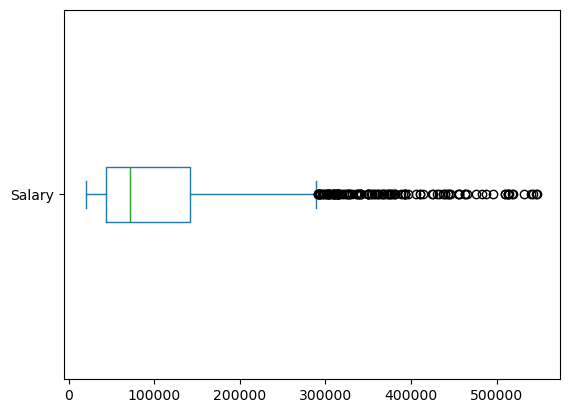

In [21]:
import matplotlib.pyplot as plt
import seaborn as sns
df_Employee['Salary'].plot(kind='box', vert=False)
plt.show()

# Identify outliers in Age

In [23]:
Quartile1 = df_Employee['Age'].quantile(0.25)
Quartile3 = df_Employee['Age'].quantile(0.75)
IQR1 = Quartile3 - Quartile1
print(IQR1)

11.0


In [24]:
lower_bound1 = Quartile1 - 1.5 * IQR1
upper_bound1 = Quartile3 + 1.5 * IQR1
print(lower_bound1)
print(upper_bound1)

6.5
50.5


In [25]:
outliers1 = df_Employee[(df_Employee['Age'] < lower_bound1) | (df_Employee['Age'] > upper_bound1)]
print(outliers1)
print(f"Number of Outliers in Age: {outliers1.shape[0]}")

     EmployeeID FirstName   LastName Gender  Age BusinessTravel  Department  \
1185  08AC-30AB      Wolf  Sainsbury   Male   51    Some Travel  Technology   

      DistanceFromHome (KM) State Ethnicity  ...  MaritalStatus  Salary  \
1185                     30    NY     White  ...       Divorced  232658   

     StockOptionLevel OverTime   HireDate  Attrition YearsAtCompany  \
1185                1       No 2021-01-17         No              1   

     YearsInMostRecentRole YearsSinceLastPromotion  YearsWithCurrManager  
1185                     1                       1                     1  

[1 rows x 23 columns]
Number of Outliers in Age: 1


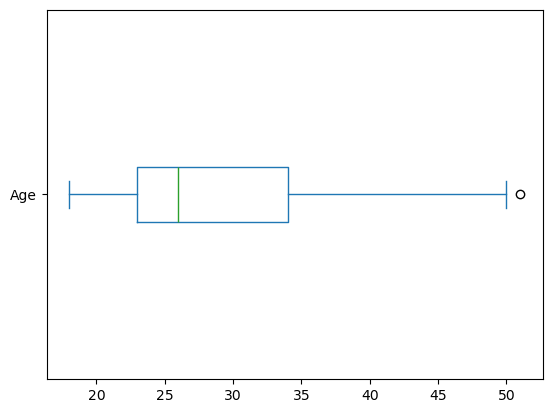

In [26]:
import matplotlib.pyplot as plt
import seaborn as sns
df_Employee['Age'].plot(kind='box', vert=False)
plt.show()

In [27]:
df_PerformanceRating = pd.read_csv("PerformanceRating.csv")
df_PerformanceRating.head()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
0,PR01,79F7-78EC,1/2/2013,5,4,5,1,0,4,4,4
1,PR02,B61E-0F26,1/3/2013,5,4,4,1,3,4,4,3
2,PR03,F5E3-48BB,1/3/2013,3,4,5,3,2,3,5,4
3,PR04,0678-748A,1/4/2013,5,3,2,2,0,2,3,2
4,PR05,541F-3E19,1/4/2013,5,2,3,1,0,4,4,3


In [28]:
df_PerformanceRating.tail()

,PerformanceID,EmployeeID,ReviewDate,EnvironmentSatisfaction,JobSatisfaction,RelationshipSatisfaction,TrainingOpportunitiesWithinYear,TrainingOpportunitiesTaken,WorkLifeBalance,SelfRating,ManagerRating
6704,PR995,4F28-CFAF,3/14/2016,5,3,3,3,1,5,5,4
6705,PR996,7C80-94E0,3/14/2016,3,5,4,2,1,3,4,4
6706,PR997,8233-2483,3/14/2016,3,4,2,3,1,2,3,2
6707,PR998,8A5B-3D6E,3/15/2016,5,2,5,2,2,4,3,3
6708,PR999,4500-37EB,3/16/2016,4,5,5,3,1,2,3,3


In [29]:
df_PerformanceRating.shape

(6709, 11)

In [30]:
df_PerformanceRating.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6709 entries, 0 to 6708
Data columns (total 11 columns):
 #   Column                           Non-Null Count  Dtype 
---  ------                           --------------  ----- 
 0   PerformanceID                    6709 non-null   object
 1   EmployeeID                       6709 non-null   object
 2   ReviewDate                       6709 non-null   object
 3   EnvironmentSatisfaction          6709 non-null   int64 
 4   JobSatisfaction                  6709 non-null   int64 
 5   RelationshipSatisfaction         6709 non-null   int64 
 6   TrainingOpportunitiesWithinYear  6709 non-null   int64 
 7   TrainingOpportunitiesTaken       6709 non-null   int64 
 8   WorkLifeBalance                  6709 non-null   int64 
 9   SelfRating                       6709 non-null   int64 
 10  ManagerRating                    6709 non-null   int64 
dtypes: int64(8), object(3)
memory usage: 576.7+ KB


In [31]:
df_PerformanceRating.describe().T

,count,mean,std,min,25%,50%,75%,max
EnvironmentSatisfaction,6709.0,3.872559,0.940701,1.0,3.0,4.0,5.0,5.0
JobSatisfaction,6709.0,3.430616,1.152565,1.0,2.0,3.0,4.0,5.0
RelationshipSatisfaction,6709.0,3.427336,1.156753,1.0,2.0,3.0,4.0,5.0
TrainingOpportunitiesWithinYear,6709.0,2.012968,0.820310,1.0,1.0,2.0,3.0,3.0
TrainingOpportunitiesTaken,6709.0,1.017290,0.950316,0.0,0.0,1.0,2.0,3.0
WorkLifeBalance,6709.0,3.414667,1.143961,1.0,2.0,3.0,4.0,5.0
SelfRating,6709.0,3.984051,0.816432,3.0,3.0,4.0,5.0,5.0
ManagerRating,6709.0,3.473394,0.961738,2.0,3.0,3.0,4.0,5.0


# Checking null values

In [33]:
df_PerformanceRating.isnull().sum()

PerformanceID                      0
EmployeeID                         0
ReviewDate                         0
EnvironmentSatisfaction            0
JobSatisfaction                    0
RelationshipSatisfaction           0
TrainingOpportunitiesWithinYear    0
TrainingOpportunitiesTaken         0
WorkLifeBalance                    0
SelfRating                         0
ManagerRating                      0
dtype: int64

# Checking duplicates in data

In [35]:
df_PerformanceRating.duplicated().sum()

0

In [37]:
df_PerformanceRating.dtypes

PerformanceID                      object
EmployeeID                         object
ReviewDate                         object
EnvironmentSatisfaction             int64
JobSatisfaction                     int64
RelationshipSatisfaction            int64
TrainingOpportunitiesWithinYear     int64
TrainingOpportunitiesTaken          int64
WorkLifeBalance                     int64
SelfRating                          int64
ManagerRating                       int64
dtype: object

# Converting datatype

In [45]:
df_PerformanceRating['ReviewDate'] = pd.to_datetime(df_PerformanceRating['ReviewDate'], errors='coerce')

In [48]:
df_PerformanceRating.dtypes

PerformanceID                              object
EmployeeID                                 object
ReviewDate                         datetime64[ns]
EnvironmentSatisfaction                     int64
JobSatisfaction                             int64
RelationshipSatisfaction                    int64
TrainingOpportunitiesWithinYear             int64
TrainingOpportunitiesTaken                  int64
WorkLifeBalance                             int64
SelfRating                                  int64
ManagerRating                               int64
dtype: object

# Data Merging Process

In [56]:
df_RatingLevel = pd.read_csv('RatingLevel.csv')
df_SatisfiedLevel = pd.read_csv('SatisfiedLevel.csv')
df_EducationLevel = pd.read_csv('EducationLevel.csv')

# Combing multiple tables into one

In [62]:
# EducationLevel
test_variable = pd.merge(df_EducationLevel,pd.merge(df_Employee, df_PerformanceRating, on='EmployeeID', how='inner'),
                         left_on='EducationLevelID',right_on='Education')
test_variable.drop(columns=['EducationLevelID'], inplace=True)

# All Satisfactions

In [70]:
# EnvironmentSatisfaction
if 'EnvironmentSatisfactionLevel' not in test_variable.columns:
    test_variable = pd.merge(
        test_variable,
        df_SatisfiedLevel,
        left_on='EnvironmentSatisfaction',
        right_on='SatisfactionID',
        how='inner'
    )
    test_variable.rename(columns={'SatisfactionLevel': 'EnvironmentSatisfactionLevel'}, inplace=True)
    test_variable.drop(columns=['SatisfactionID'], inplace=True)

In [73]:
# JobSatisfaction
if 'JobSatisfactionLevel' not in test_variable.columns:
    test_variable = pd.merge(
        test_variable,
        df_SatisfiedLevel,
        left_on='JobSatisfaction',
        right_on='SatisfactionID',
        how='inner'
    )
    test_variable.rename(columns={'SatisfactionLevel': 'JobSatisfactionLevel'}, inplace=True)
    test_variable.drop(columns=['SatisfactionID'], inplace=True)

In [75]:
# RelationshipSatisfaction
if 'RelationshipSatisfactionLevel' not in test_variable.columns:
    test_variable = pd.merge(
        test_variable,
        df_SatisfiedLevel,
        left_on='RelationshipSatisfaction',
        right_on='SatisfactionID',
        how='inner'
    )
    test_variable.rename(columns={'SatisfactionLevel': 'RelationshipSatisfactionLevel'}, inplace=True)
    test_variable.drop(columns=['SatisfactionID'], inplace=True)

# All Ratings

In [79]:
# WorkLifeBalance
if 'WorkLifeBalanceRatingLevel' not in test_variable.columns:
    test_variable = pd.merge(test_variable,df_RatingLevel,left_on='WorkLifeBalance',right_on = 'RatingID',how='inner')
    test_variable.rename(columns={'RatingLevel':'WorkLifeBalanceRatingLevel'},inplace = True)
    test_variable.drop(columns=['RatingID'],inplace = True)

In [80]:
# Self Rating
if 'SelfRatingLevel' not in test_variable.columns:
    test_variable = pd.merge(
        test_variable,
        df_RatingLevel,
        left_on='SelfRating',
        right_on='RatingID',
        how='inner'
    )
    test_variable.rename(columns={'RatingLevel': 'SelfRatingLevel'}, inplace=True)
    test_variable.drop(columns=['RatingID'], inplace=True)

In [82]:
# Manager Rating
if 'ManagerRatingLevel' not in test_variable.columns:
    test_variable = pd.merge(
        test_variable,
        df_RatingLevel,
        left_on='ManagerRating',
        right_on='RatingID',
        how='inner'
    )
    test_variable.rename(columns={'RatingLevel': 'ManagerRatingLevel'}, inplace=True)
    test_variable.drop(columns=['RatingID'], inplace=True)

In [83]:
final_data = test_variable[[
 'EmployeeID',
 'FirstName',
 'LastName',
 'Gender',
 'Age',
 'BusinessTravel',
 'Department',
 'DistanceFromHome (KM)',
 'State',
 'Ethnicity',
 'Education',
 'EducationLevel',
 'EducationField',
 'JobRole',
 'MaritalStatus',
 'Salary',
 'StockOptionLevel',
 'OverTime',
 'HireDate',
 'Attrition',
 'YearsAtCompany',
 'YearsInMostRecentRole',
 'YearsSinceLastPromotion',
 'YearsWithCurrManager',
 'PerformanceID',
 'ReviewDate',
 'EnvironmentSatisfaction',
 'EnvironmentSatisfactionLevel',
 'JobSatisfaction',
 'JobSatisfactionLevel',
 'RelationshipSatisfaction',
 'RelationshipSatisfactionLevel',
 'TrainingOpportunitiesWithinYear',
 'TrainingOpportunitiesTaken',
 'WorkLifeBalance',
 'WorkLifeBalanceRatingLevel',
 'SelfRating',
 'SelfRatingLevel',
 'ManagerRating',
 'ManagerRatingLevel']].copy()

In [85]:
final_data.head().T

,0,1,2,3,4
EmployeeID,ED73-F078,ED73-F078,ED73-F078,ED73-F078,ED73-F078
FirstName,Ernaline,Ernaline,Ernaline,Ernaline,Ernaline
LastName,Napolione,Napolione,Napolione,Napolione,Napolione
Gender,Female,Female,Female,Female,Female
Age,45,45,45,45,45
BusinessTravel,Frequent Traveller,Frequent Traveller,Frequent Traveller,Frequent Traveller,Frequent Traveller
Department,Technology,Technology,Technology,Technology,Technology
DistanceFromHome (KM),19,19,19,19,19
State,NY,NY,NY,NY,NY
Ethnicity,Asian or Asian American,Asian or Asian American,Asian or Asian American,Asian or Asian American,Asian or Asian American


In [88]:
final_data.shape

(6709, 40)

In [90]:
final_data.isnull().sum()

EmployeeID                         0
FirstName                          0
LastName                           0
Gender                             0
Age                                0
BusinessTravel                     0
Department                         0
DistanceFromHome (KM)              0
State                              0
Ethnicity                          0
Education                          0
EducationLevel                     0
EducationField                     0
JobRole                            0
MaritalStatus                      0
Salary                             0
StockOptionLevel                   0
OverTime                           0
HireDate                           0
Attrition                          0
YearsAtCompany                     0
YearsInMostRecentRole              0
YearsSinceLastPromotion            0
YearsWithCurrManager               0
PerformanceID                      0
ReviewDate                         0
EnvironmentSatisfaction            0
E

In [95]:
final_data.duplicated().sum()

0

#  Summary of Data Cleaning & Merging  

# 🔍 Data Exploration & Cleaning:
We started by displaying the tables to understand the structure and check for missing values, duplicates, and data types.

# Employee Table:

Consisted of (1470 rows, 23 columns).

Verified that there were no missing or duplicate values.

Converted the HireDate column from object to datetime64[ns] to support time-based analysis.

# PerformanceRating Table:

Contained (6709 rows, 11 columns).

Verified that there were no missing or duplicate values.

Converted the ReviewDate column from object to datetime64[ns] to support time-based analysis.

Outliers were also checked and handled in both Employee and PerformanceRating tables to ensure data integrity.

# 🔗 Data Merging:
The following tables were merged into one comprehensive dataset:

Employee
PerformanceRating
RatingLevel
SatisfiedLevel
EducationLevel

A final merged table named final_data was created, consisting of (6709 rows, 40 columns).

After merging, final_data was carefully reviewed to ensure:
No missing or duplicate values exist.

# Conclusion:  
The final dataset is **clean, structured, and ready** for further analysis.  


#  2: Analysis Questions Phase

In [104]:
total_employees = df_Employee.shape[0]
print(f"Total number of employees in the company: {total_employees}")

Total number of employees in the company: 1470


In [106]:
employees_left = df_Employee[df_Employee['Attrition'] == 'Yes'].shape[0]
print(f"Number of employees who left the company: {employees_left}")

Number of employees who left the company: 237


In [108]:
average_age = df_Employee['Age'].mean()
print(f"Average Age: {average_age}")

Average Age: 28.989795918367346


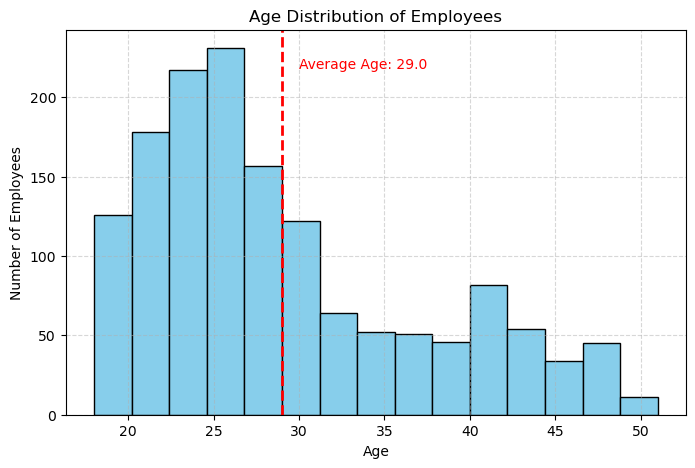

In [110]:
plt.figure(figsize=(8, 5))
plt.hist(df_Employee['Age'], bins=15, color='skyblue', edgecolor='black')

plt.axvline(average_age, color='red', linestyle='dashed', linewidth=2)
plt.text(average_age + 1, plt.ylim()[1]*0.9, f'Average Age: {average_age:.1f}', color='red')

plt.title('Age Distribution of Employees')
plt.xlabel('Age')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [111]:
average_salary = df_Employee['Salary'].mean()
print(f"Average Salary: {average_salary}")

Average Salary: 112956.49795918367


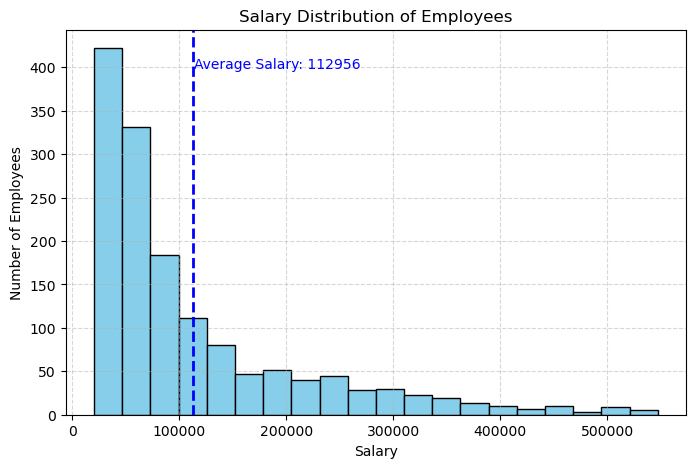

In [112]:
plt.figure(figsize=(8, 5))
plt.hist(df_Employee['Salary'], bins=20, color='skyblue', edgecolor='black')

plt.axvline(average_salary, color='blue', linestyle='dashed', linewidth=2)
plt.text(average_salary + 1000, plt.ylim()[1]*0.9, f'Average Salary: {average_salary:.0f}', color='blue')

plt.title('Salary Distribution of Employees')
plt.xlabel('Salary')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [114]:
average_years_at_company = df_Employee['YearsAtCompany'].mean()
print(f"Average Years at Company: {average_years_at_company}")

Average Years at Company: 4.562585034013606


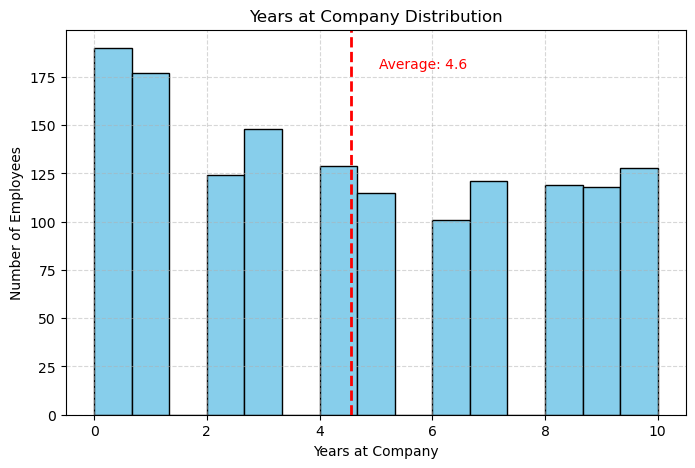

In [116]:
plt.figure(figsize=(8, 5))
plt.hist(df_Employee['YearsAtCompany'], bins=15, color='skyblue', edgecolor='black')

plt.axvline(average_years_at_company, color='red', linestyle='dashed', linewidth=2)
plt.text(average_years_at_company + 0.5, plt.ylim()[1]*0.9, 
         f'Average: {average_years_at_company:.1f}', color='red')

plt.title('Years at Company Distribution')
plt.xlabel('Years at Company')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [117]:
average_years_in_role = df_Employee['YearsInMostRecentRole'].mean()
print(f"Average Years in Most Recent Role: {average_years_in_role}")

Average Years in Most Recent Role: 2.2931972789115647


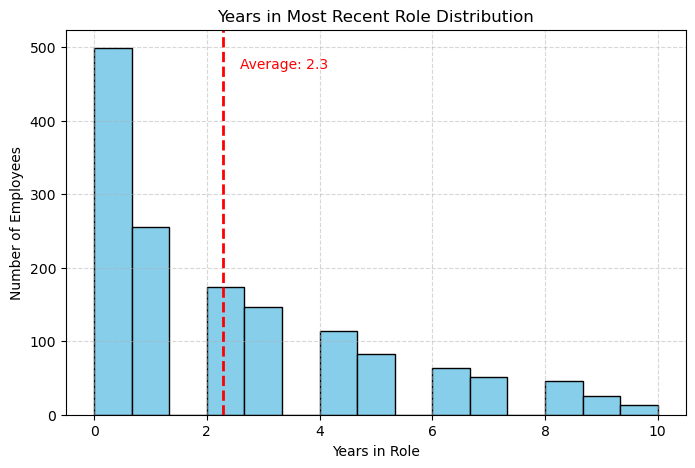

In [119]:
plt.figure(figsize=(8, 5))
plt.hist(df_Employee['YearsInMostRecentRole'], bins=15, color='skyblue', edgecolor='black')

plt.axvline(average_years_in_role, color='red', linestyle='dashed', linewidth=2)
plt.text(average_years_in_role + 0.3, plt.ylim()[1]*0.9, 
         f'Average: {average_years_in_role:.1f}', color='red')

plt.title('Years in Most Recent Role Distribution')
plt.xlabel('Years in Role')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [121]:
average_years_since_promotion = df_Employee['YearsSinceLastPromotion'].mean()
print(f"Average Years Since Last Promotion: {average_years_since_promotion}")

Average Years Since Last Promotion: 3.440816326530612


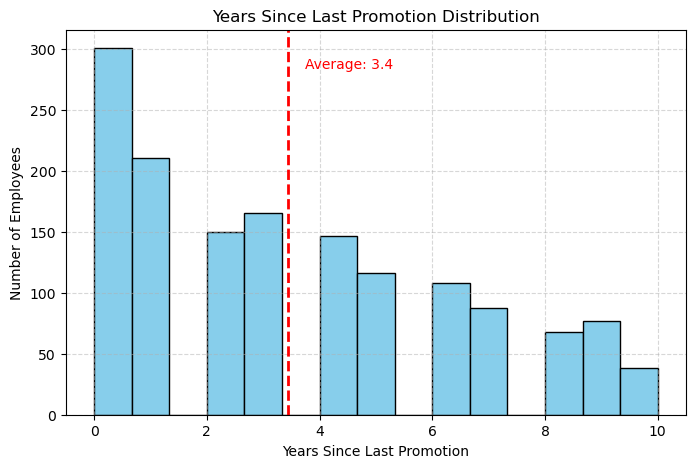

In [122]:
plt.figure(figsize=(8, 5))
plt.hist(df_Employee['YearsSinceLastPromotion'], bins=15, color='skyblue', edgecolor='black')

plt.axvline(average_years_since_promotion, color='red', linestyle='dashed', linewidth=2)
plt.text(average_years_since_promotion + 0.3, plt.ylim()[1]*0.9, 
         f'Average: {average_years_since_promotion:.1f}', color='red')

plt.title('Years Since Last Promotion Distribution')
plt.xlabel('Years Since Last Promotion')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [123]:
average_years_with_manager = df_Employee['YearsWithCurrManager'].mean()
print(f"Average Years with Current Manager: {average_years_with_manager}")

Average Years with Current Manager: 2.239455782312925


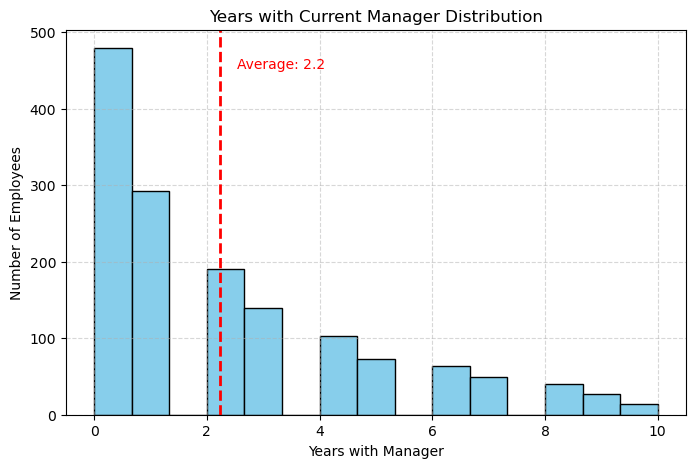

In [126]:
plt.figure(figsize=(8, 5))
plt.hist(df_Employee['YearsWithCurrManager'], bins=15, color='skyblue', edgecolor='black')

plt.axvline(average_years_with_manager, color='red', linestyle='dashed', linewidth=2)
plt.text(average_years_with_manager + 0.3, plt.ylim()[1]*0.9, 
         f'Average: {average_years_with_manager:.1f}', color='red')

plt.title('Years with Current Manager Distribution')
plt.xlabel('Years with Manager')
plt.ylabel('Number of Employees')
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [127]:
average_overtime = df_Employee['OverTime'].value_counts(normalize=True).get('Yes', 0)
print(f"Percentage of Employees with Overtime: {average_overtime * 100}%")

Percentage of Employees with Overtime: 28.29931972789116%


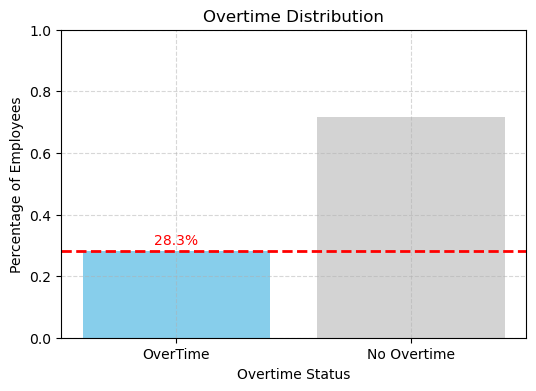

In [129]:
plt.figure(figsize=(6, 4))
plt.bar(['OverTime', 'No Overtime'], [average_overtime, 1 - average_overtime], color=['skyblue', 'lightgray'])

plt.axhline(average_overtime, color='red', linestyle='dashed', linewidth=2)
plt.text(0, average_overtime + 0.02, f'{average_overtime * 100:.1f}%', color='red', ha='center')

plt.title('Overtime Distribution')
plt.ylabel('Percentage of Employees')
plt.xlabel('Overtime Status')
plt.ylim(0, 1)  # To ensure the chart starts from 0 and goes to 1 (100%)
plt.grid(True, linestyle='--', alpha=0.5)
plt.show()

In [131]:
attrition_rate = df_Employee['Attrition'].value_counts(normalize=True) * 100
print("\n Overall Attrition Rate:\n", attrition_rate)


 Overall Attrition Rate:
 Attrition
No     83.877551
Yes    16.122449
Name: proportion, dtype: float64


In [132]:
attrition_percentage = (df_Employee['Attrition'].value_counts(normalize=True)['Yes']) * 100
print(f"\n Attrition Rate in the Company: {attrition_percentage:.2f}%")


 Attrition Rate in the Company: 16.12%


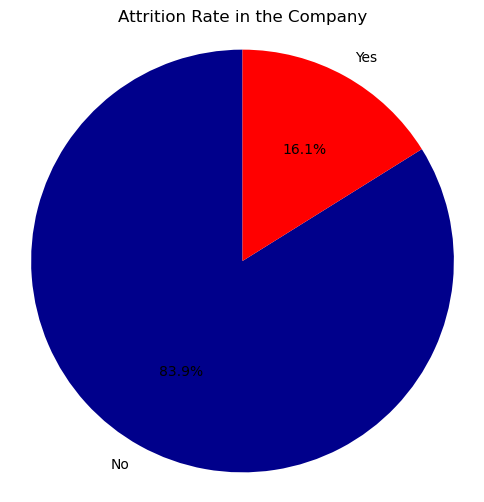

In [134]:
import matplotlib.pyplot as plt

attrition_counts = df_Employee['Attrition'].value_counts()
attrition_labels = attrition_counts.index
attrition_values = attrition_counts.values

plt.figure(figsize=(6, 6))
plt.pie(attrition_values, 
        labels=attrition_labels, 
        autopct='%1.1f%%', 
        startangle=90, 
        colors=['darkblue', 'red']) 

plt.title('Attrition Rate in the Company')
plt.axis('equal') 
plt.show()

In [136]:
# Analysis of the relationship between attrition and personal characteristics
gender_attrition = df_Employee.groupby('Attrition')['Gender'].value_counts()
age_attrition = df_Employee.groupby('Attrition')['Age'].mean()
marital_status_attrition = df_Employee.groupby('Attrition')['MaritalStatus'].value_counts()

print("Analysis of the relationship between attrition and Gender:\n", gender_attrition)
print("\nAnalysis of the relationship between attrition and Age:\n", age_attrition)
print("\nAnalysis of the relationship between attrition and MaritalStatus:\n", marital_status_attrition)

Analysis of the relationship between attrition and Gender:
 Attrition  Gender           
No         Female               571
           Male                 537
           Non-Binary           105
           Prefer Not To Say     20
Yes        Male                 114
           Female               104
           Non-Binary            19
Name: count, dtype: int64

Analysis of the relationship between attrition and Age:
 Attrition
No     29.460665
Yes    26.540084
Name: Age, dtype: float64

Analysis of the relationship between attrition and MaritalStatus:
 Attrition  MaritalStatus
No         Married          545
           Single           421
           Divorced         267
Yes        Single           128
           Married           79
           Divorced          30
Name: count, dtype: int64


In [137]:
# Analysis of the relationship between attrition and job-related factors
job_role_attrition = df_Employee.groupby('Attrition')['JobRole'].value_counts()
department_attrition = df_Employee.groupby('Attrition')['Department'].value_counts()
salary_attrition = df_Employee.groupby('Attrition')['Salary'].value_counts()
overtime_attrition = df_Employee.groupby('Attrition')['OverTime'].value_counts()

print("\nAnalysis of the relationship between attrition and job role:\n", job_role_attrition)
print("\nAnalysis of the relationship between attrition and department:\n", department_attrition)
print("\nAnalysis of the relationship between attrition and salary:\n", salary_attrition)
print("\nAnalysis of the relationship between attrition and overtime:\n", overtime_attrition)


Analysis of the relationship between attrition and job role:
 Attrition  JobRole                  
No         Sales Executive              270
           Software Engineer            247
           Data Scientist               199
           Machine Learning Engineer    136
           Senior Software Engineer     123
           Engineering Manager           73
           Sales Representative          50
           Analytics Manager             49
           Manager                       35
           HR Executive                  25
           Recruiter                     15
           HR Business Partner            7
           HR Manager                     4
Yes        Data Scientist                62
           Sales Executive               57
           Software Engineer             47
           Sales Representative          33
           Machine Learning Engineer     10
           Recruiter                      9
           Senior Software Engineer       9
           Analytics

In [138]:
# Analysis of the relationship between attrition and work tenure
years_at_company_attrition = df_Employee.groupby('Attrition')['YearsAtCompany'].mean()
years_in_role_attrition = df_Employee.groupby('Attrition')['YearsInMostRecentRole'].mean()
years_since_promotion_attrition =df_Employee.groupby('Attrition')['YearsSinceLastPromotion'].mean()
years_with_manager_attrition = df_Employee.groupby('Attrition')['YearsWithCurrManager'].mean()

print("\nAnalysis of the relationship between attrition and years at company:\n", years_at_company_attrition)
print("\nAnalysis of the relationship between attrition and years in most recent role:\n", years_in_role_attrition)
print("\nAnalysis of the relationship between attrition and years since last promotion:\n", years_since_promotion_attrition)
print("\nAnalysis of the relationship between attrition and years with current manager:\n", years_with_manager_attrition)


Analysis of the relationship between attrition and years at company:
 Attrition
No     4.973236
Yes    2.426160
Name: YearsAtCompany, dtype: float64

Analysis of the relationship between attrition and years in most recent role:
 Attrition
No     2.543390
Yes    0.991561
Name: YearsInMostRecentRole, dtype: float64

Analysis of the relationship between attrition and years since last promotion:
 Attrition
No     3.824818
Yes    1.443038
Name: YearsSinceLastPromotion, dtype: float64

Analysis of the relationship between attrition and years with current manager:
 Attrition
No     2.480941
Yes    0.983122
Name: YearsWithCurrManager, dtype: float64


In [141]:
# Analysis of the relationship between attrition and education
education_attrition = df_Employee.groupby('Attrition')['Education'].value_counts()
education_field_attrition = df_Employee.groupby('Attrition')['EducationField'].value_counts()

print("\nAnalysis of the relationship between attrition and education:\n", education_attrition)
print("\nAnalysis of the relationship between attrition and education field:\n", education_field_attrition)


Analysis of the relationship between attrition and education:
 Attrition  Education
No         3            473
           4            340
           2            238
           1            139
           5             43
Yes        3             99
           4             58
           2             44
           1             31
           5              5
Name: count, dtype: int64

Analysis of the relationship between attrition and education field:
 Attrition  EducationField     
No         Computer Science       381
           Information Systems    316
           Marketing              136
           Marketing              124
           Economics               85
           Business Studies        74
           Other                   71
           Technical Degree        26
           Human Resources         20
Yes        Computer Science        59
           Information Systems     47
           Marketing               35
           Marketing               30
           Bus

In [142]:
# Analysis of the relationship between attrition and job satisfaction factors
env_satisfaction_attrition = final_data.groupby('Attrition')['EnvironmentSatisfaction'].mean()
job_satisfaction_attrition = final_data.groupby('Attrition')['JobSatisfaction'].mean()
rel_satisfaction_attrition = final_data.groupby('Attrition')['RelationshipSatisfaction'].mean()
work_life_balance_attrition = final_data.groupby('Attrition')['WorkLifeBalance'].mean()

print("\nAnalysis of the relationship between attrition and environmental satisfaction:\n", env_satisfaction_attrition)
print("\nAnalysis of the relationship between attrition and job satisfaction:\n", job_satisfaction_attrition)
print("\nAnalysis of the relationship between attrition and relationship satisfaction:\n", rel_satisfaction_attrition)
print("\nAnalysis of the relationship between attrition and work-life balance:\n", work_life_balance_attrition)


Analysis of the relationship between attrition and environmental satisfaction:
 Attrition
No     3.868255
Yes    3.881026
Name: EnvironmentSatisfaction, dtype: float64

Analysis of the relationship between attrition and job satisfaction:
 Attrition
No     3.419739
Yes    3.452012
Name: JobSatisfaction, dtype: float64

Analysis of the relationship between attrition and relationship satisfaction:
 Attrition
No     3.419290
Yes    3.443167
Name: RelationshipSatisfaction, dtype: float64

Analysis of the relationship between attrition and work-life balance:
 Attrition
No     3.411871
Yes    3.420168
Name: WorkLifeBalance, dtype: float64


In [145]:
# Merge Age and YearsAtCompany to analyze their relationship with attrition
df_Employee['Age_YearsAtCompany'] = df_Employee['Age'] * df_Employee['YearsAtCompany']
age_years_at_company_grouped = df_Employee.groupby('Attrition')['Age_YearsAtCompany'].mean()
print(age_years_at_company_grouped)

Attrition
No     160.997567
Yes     71.286920
Name: Age_YearsAtCompany, dtype: float64


In [147]:
# Merge JobSatisfaction and YearsWithCurrManager to analyze their relationship with attrition
final_data['JobSatisfaction_YearsWithCurrManager'] = final_data['JobSatisfaction'] * final_data['YearsWithCurrManager']
job_satisfaction_years_manager_grouped = final_data.groupby('Attrition')['JobSatisfaction_YearsWithCurrManager'].mean()
print(job_satisfaction_years_manager_grouped)

Attrition
No     12.769335
Yes     3.540911
Name: JobSatisfaction_YearsWithCurrManager, dtype: float64


In [149]:
# Merge Education and JobRole to analyze their relationship with attrition
education_jobrole_grouped = df_Employee.groupby(['Attrition', 'Education', 'JobRole']).size().unstack(fill_value=0)
print(education_jobrole_grouped)

JobRole              Analytics Manager  Data Scientist  Engineering Manager  \
Attrition Education                                                           
No        1                          5              27                    7   
          2                          9              46                   12   
          3                         21              73                   28   
          4                         12              48                   19   
          5                          2               5                    7   
Yes       1                          1               8                    0   
          2                          0              12                    0   
          3                          1              31                    1   
          4                          1              11                    1   
          5                          0               0                    0   

JobRole              HR Business Partner  HR Execut

In [153]:
# Merge OverTime and JobSatisfaction to analyze their relationship with attrition
final_data['OverTime_JobSatisfaction'] = final_data['OverTime'].map({'Yes': 1, 'No': 0}) * final_data['JobSatisfaction']
overtime_job_satisfaction_grouped = final_data.groupby('Attrition')['OverTime_JobSatisfaction'].mean()
print(overtime_job_satisfaction_grouped)

Attrition
No     0.799236
Yes    1.855374
Name: OverTime_JobSatisfaction, dtype: float64


In [154]:
# Merge JobRole and Department to analyze their relationship with attrition
jobrole_department_grouped = df_Employee.groupby(['Attrition', 'JobRole', 'Department']).size().unstack(fill_value=0)
print(jobrole_department_grouped)

Department                           Human Resources  Sales  Technology
Attrition JobRole                                                      
No        Analytics Manager                        0      0          49
          Data Scientist                           0      0         199
          Engineering Manager                      0      0          73
          HR Business Partner                      7      0           0
          HR Executive                            25      0           0
          HR Manager                               4      0           0
          Machine Learning Engineer                0      0         136
          Manager                                  0     35           0
          Recruiter                               15      0           0
          Sales Executive                          0    269           1
          Sales Representative                     0     50           0
          Senior Software Engineer                 0      0     

In [158]:
# Merge JobRole and EducationField to analyze their relationship with attrition
jobrole_educationfield_grouped = df_Employee.groupby(['Attrition', 'JobRole', 'EducationField']).size().unstack(fill_value=0)
print(jobrole_educationfield_grouped)

EducationField                       Business Studies  Computer Science  \
Attrition JobRole                                                         
No        Analytics Manager                         3                19   
          Data Scientist                           11                88   
          Engineering Manager                       4                33   
          HR Business Partner                       0                 0   
          HR Executive                              0                 0   
          HR Manager                                0                 0   
          Machine Learning Engineer                13                67   
          Manager                                   0                 0   
          Recruiter                                 0                 0   
          Sales Executive                           0                 0   
          Sales Representative                      0                 0   
          Senior Software

In [160]:
# Merge YearsAtCompany and YearsSinceLastPromotion to analyze their relationship with attrition
df_Employee['YearsAtCompany_YearsSinceLastPromotion'] = df_Employee['YearsAtCompany'] * df_Employee['YearsSinceLastPromotion']
years_experience_promotion_grouped = df_Employee.groupby('Attrition')['YearsAtCompany_YearsSinceLastPromotion'].mean()
print(years_experience_promotion_grouped)

Attrition
No     27.187348
Yes     7.886076
Name: YearsAtCompany_YearsSinceLastPromotion, dtype: float64


In [162]:
# Analyze the relationship between job satisfaction, overtime, and attrition
satisfaction_overtime_attrition = final_data.groupby(['Attrition', 'JobSatisfaction', 'OverTime']).size().unstack(fill_value=0)

# Analyze the relationship between job satisfaction, education level, and attrition
satisfaction_education_attrition = final_data.groupby(['Attrition', 'JobSatisfaction', 'EducationLevel']).size().unstack(fill_value=0)

# Display the results
print("Analysis of the relationship between job satisfaction, overtime, and attrition:\n", satisfaction_overtime_attrition)
print("\nAnalysis of the relationship between job satisfaction, education level, and attrition:\n", satisfaction_education_attrition)

Analysis of the relationship between job satisfaction, overtime, and attrition:
 OverTime                    No  Yes
Attrition JobSatisfaction          
No        1                 76   18
          2                863  262
          3                851  232
          4                859  253
          5                773  261
Yes       1                 15   21
          2                267  282
          3                259  309
          4                261  312
          5                248  287

Analysis of the relationship between job satisfaction, education level, and attrition:
 EducationLevel             Bachelors   Doctorate  High School   Masters   \
Attrition JobSatisfaction                                                  
No        1                        39          2            13        22   
          2                       423         51           241       268   
          3                       404         36           223       281   
          4       

In [165]:
promotion_age_grouped = df_Employee.groupby(['Attrition'])[['Age', 'YearsSinceLastPromotion']].mean()
print(promotion_age_grouped)

                 Age  YearsSinceLastPromotion
Attrition                                    
No         29.460665                 3.824818
Yes        26.540084                 1.443038


In [167]:
salary_department_attrition = df_Employee.groupby(['Attrition', 'Department'])['Salary'].mean().unstack()
print(salary_department_attrition)

Department  Human Resources          Sales     Technology
Attrition                                                
No            133366.235294  123893.353107  115809.247585
Yes            61612.250000  100741.380435   71342.225564


In [169]:
wlb_overtime_attrition = final_data.groupby(['Attrition', 'WorkLifeBalance', 'OverTime']).size().unstack(fill_value=0)
print(wlb_overtime_attrition)

OverTime                    No  Yes
Attrition WorkLifeBalance          
No        1                 59   25
          2                860  274
          3                870  220
          4                874  272
          5                759  235
Yes       1                 14   23
          2                267  301
          3                266  314
          4                254  306
          5                249  267


In [171]:
training_manager_grouped = final_data.groupby(['Attrition'])[['TrainingOpportunitiesWithinYear', 'YearsWithCurrManager']].mean()
print(training_manager_grouped)

           TrainingOpportunitiesWithinYear  YearsWithCurrManager
Attrition                                                       
No                                2.016187              3.729541
Yes                               2.006634              1.014595


In [174]:
rating_diff = final_data.copy()
rating_diff['RatingGap'] = rating_diff['SelfRating'] - rating_diff['ManagerRating']
rating_gap_grouped = rating_diff.groupby('Attrition')['RatingGap'].mean()
print(rating_gap_grouped)

Attrition
No     0.503822
Yes    0.524104
Name: RatingGap, dtype: float64


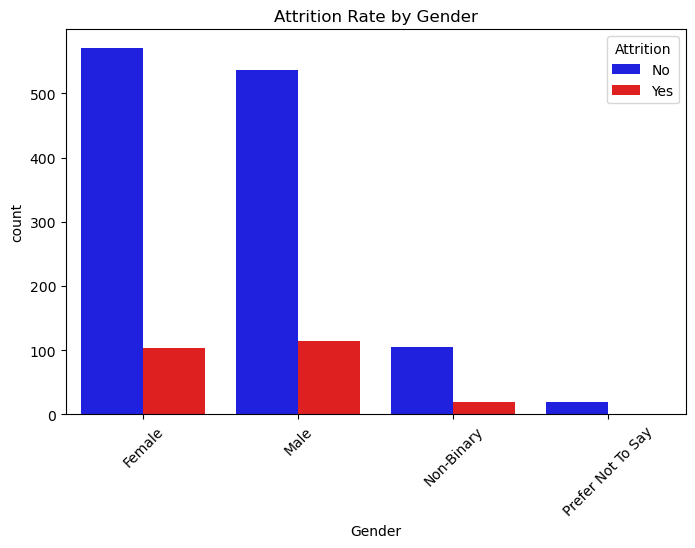

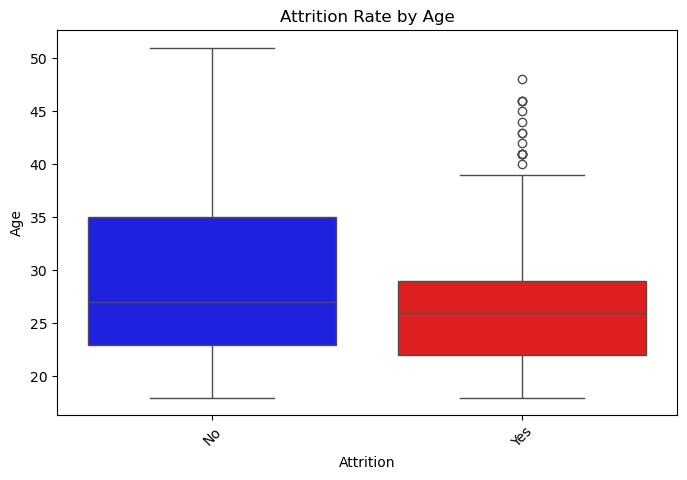

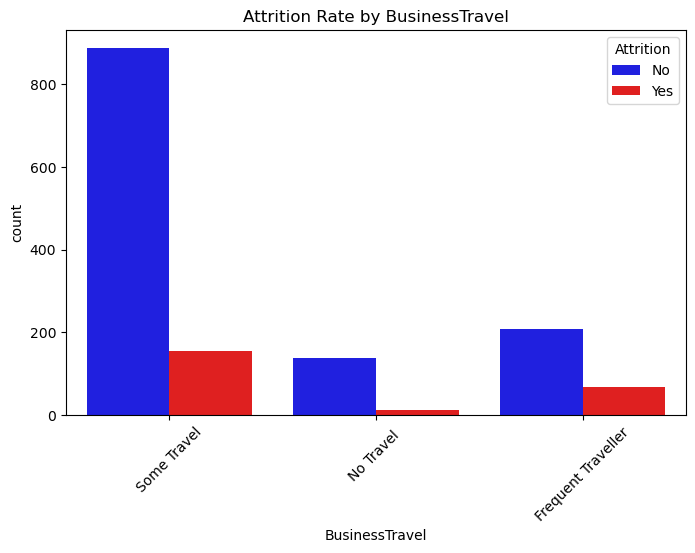

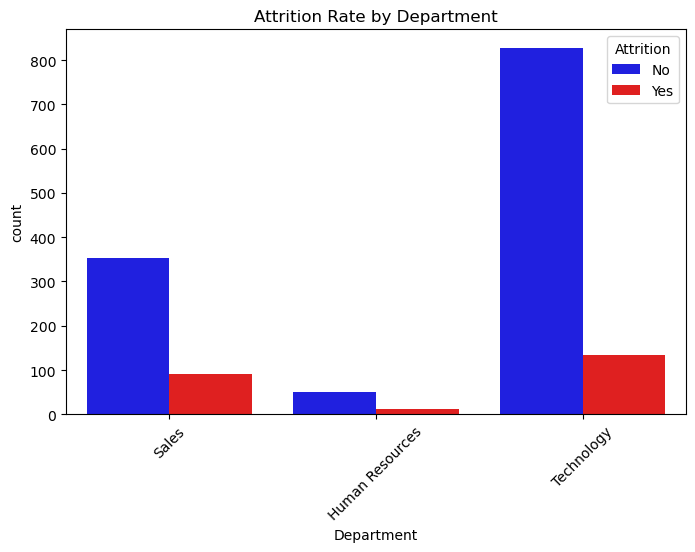

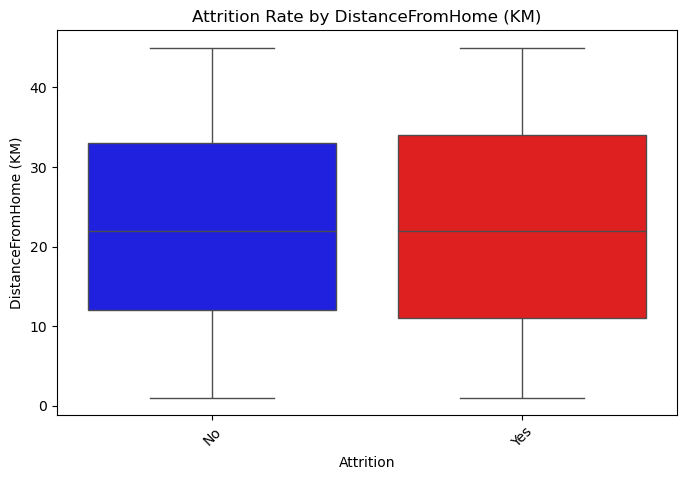

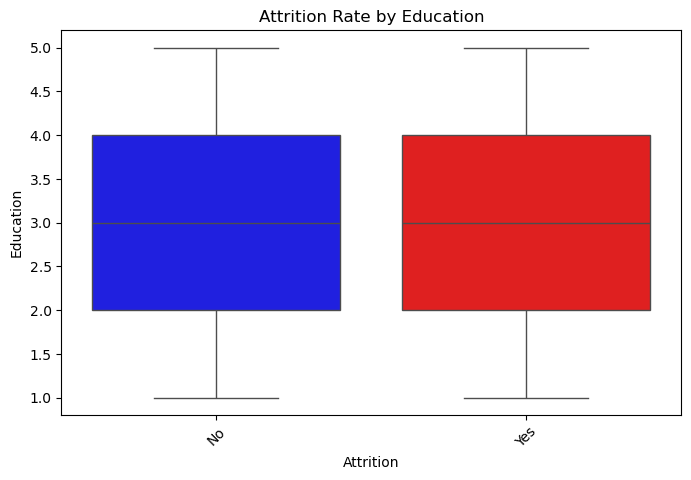

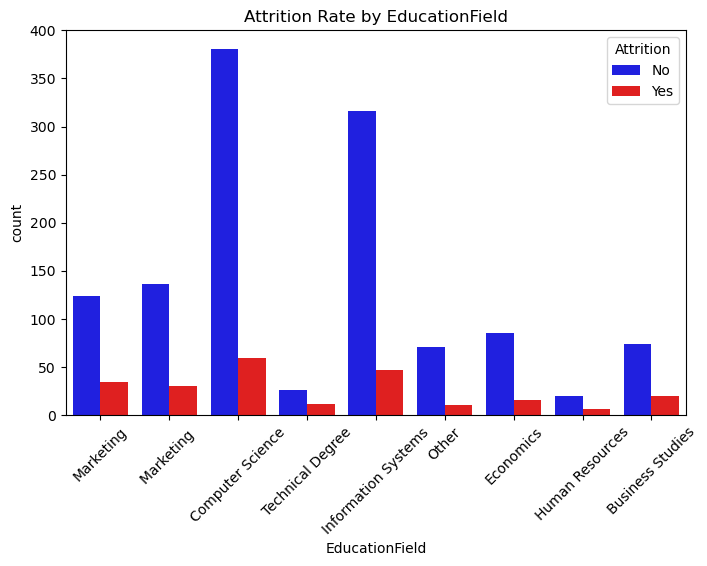

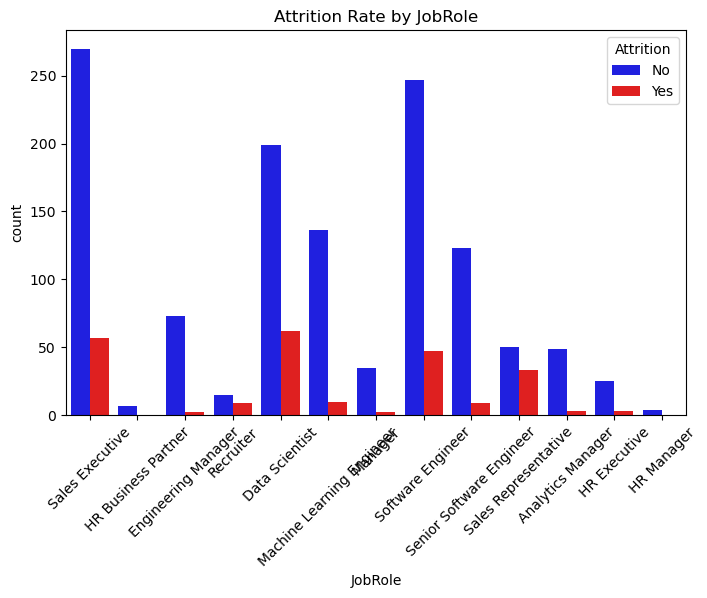

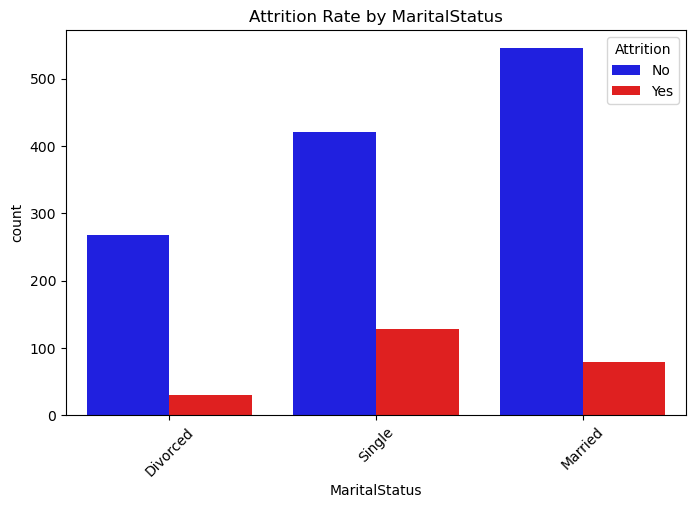

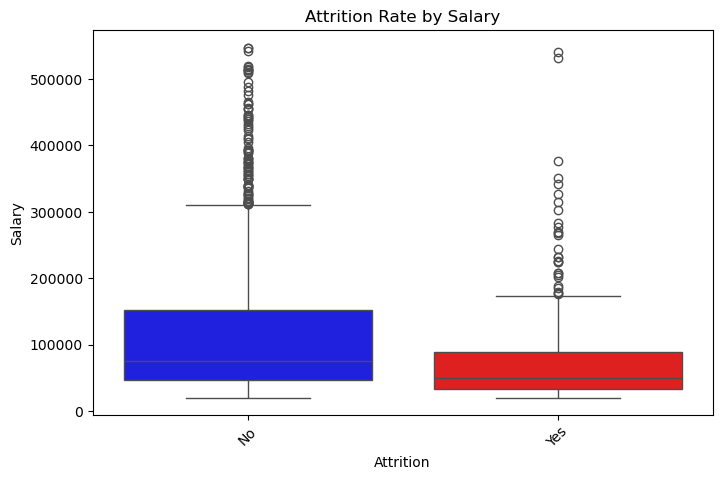

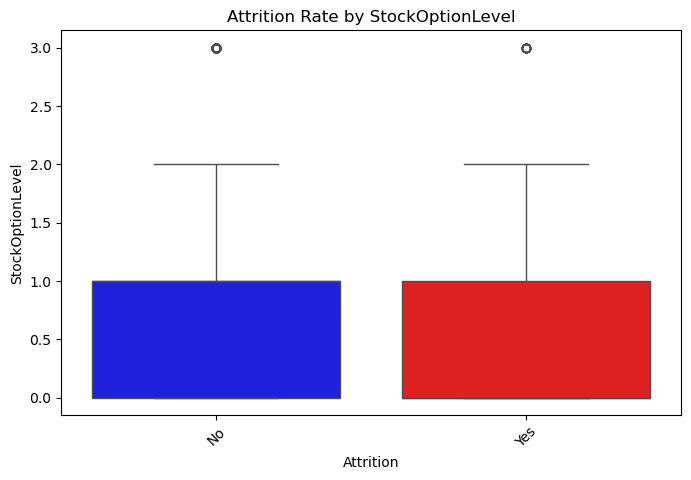

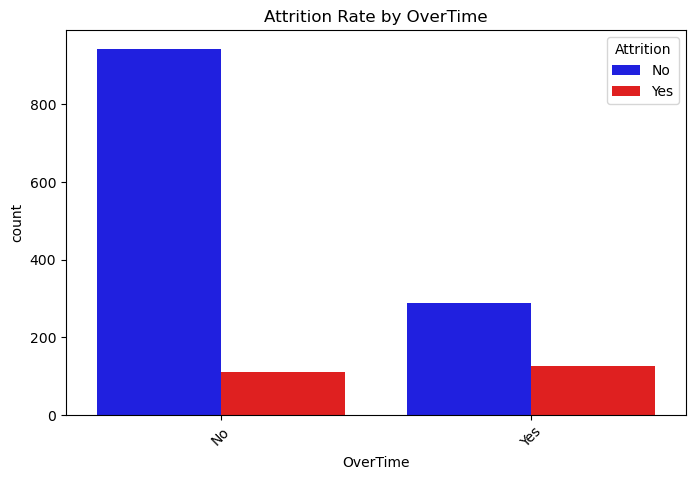

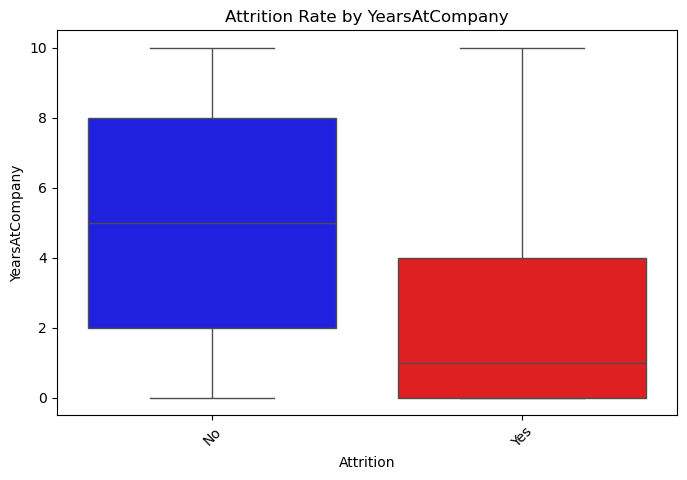

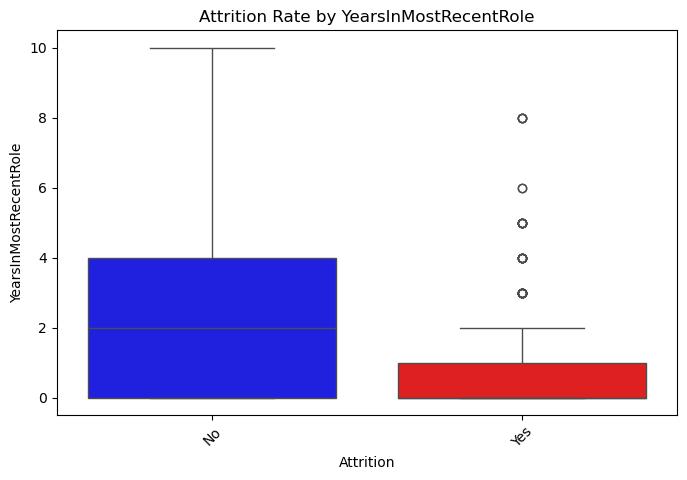

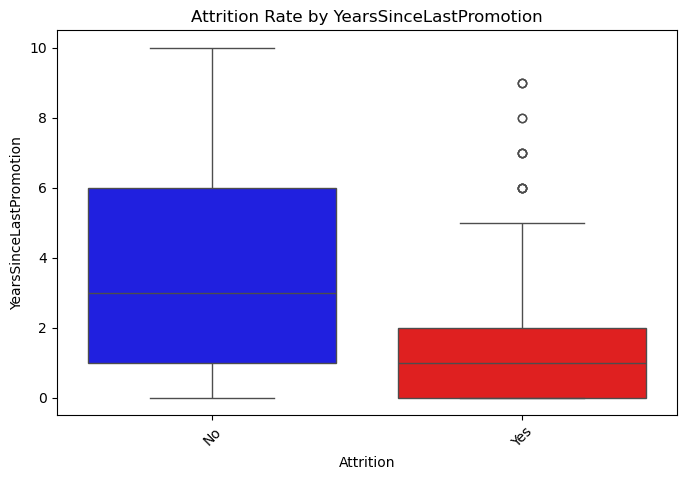

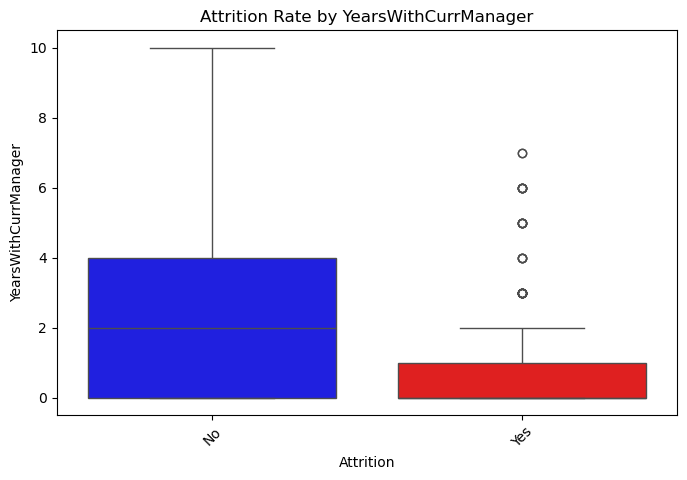

In [176]:
factors_Employees = ['Gender', 'Age', 'BusinessTravel', 'Department', 'DistanceFromHome (KM)', 'Education', 'EducationField', 'JobRole', 'MaritalStatus', 'Salary', 'StockOptionLevel', 'OverTime', 'YearsAtCompany', 'YearsInMostRecentRole', 'YearsSinceLastPromotion', 'YearsWithCurrManager']

for factor in factors_Employees:
    plt.figure(figsize=(8, 5))
    if df_Employee[factor].dtype == 'object':
        sns.countplot(x=df_Employee[factor], hue=df_Employee['Attrition'], palette={'Yes': 'red', 'No': 'blue'})
    else:
        sns.boxplot(x=df_Employee['Attrition'], y=df_Employee[factor], hue=df_Employee['Attrition'], palette={'Yes': 'red', 'No': 'blue'}, legend=False)
    plt.title(f"Attrition Rate by {factor}")
    plt.xticks(rotation=45)
    plt.show()

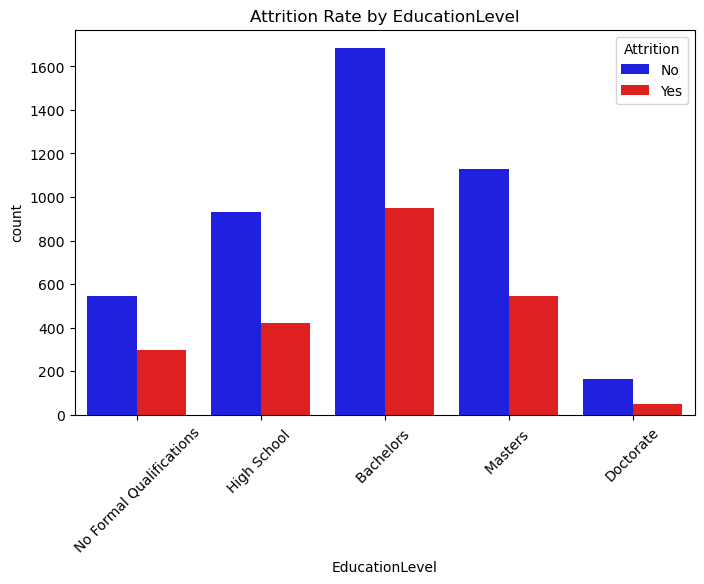

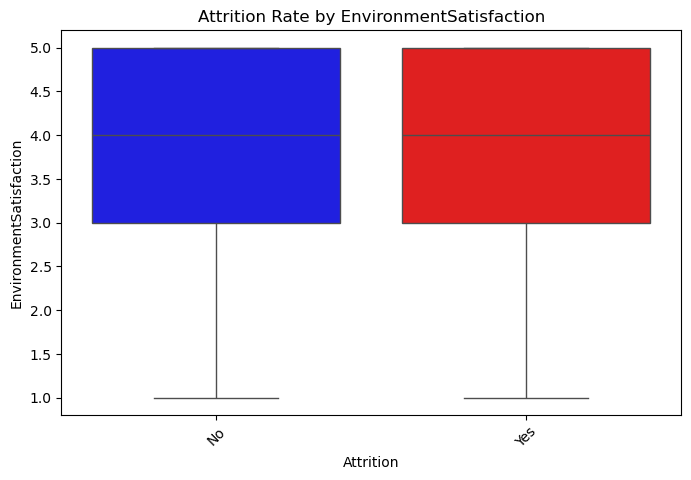

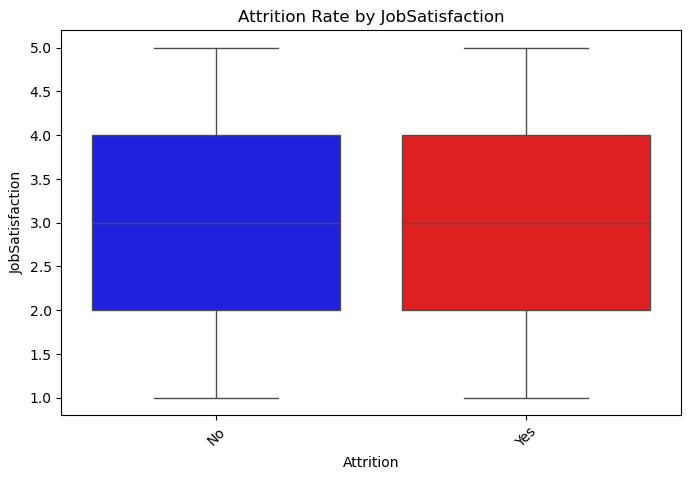

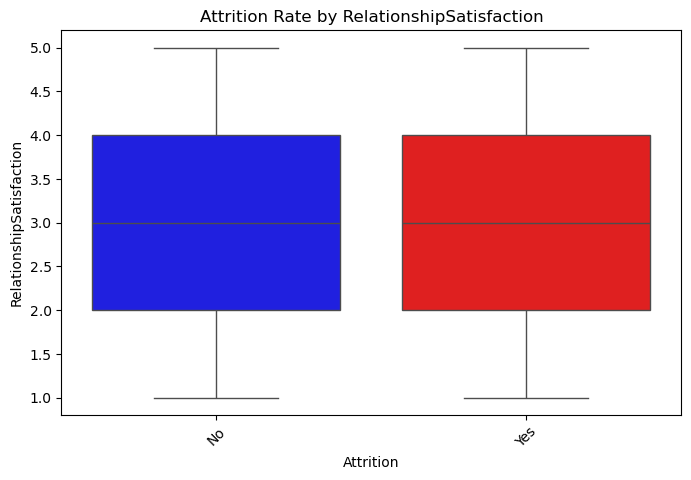

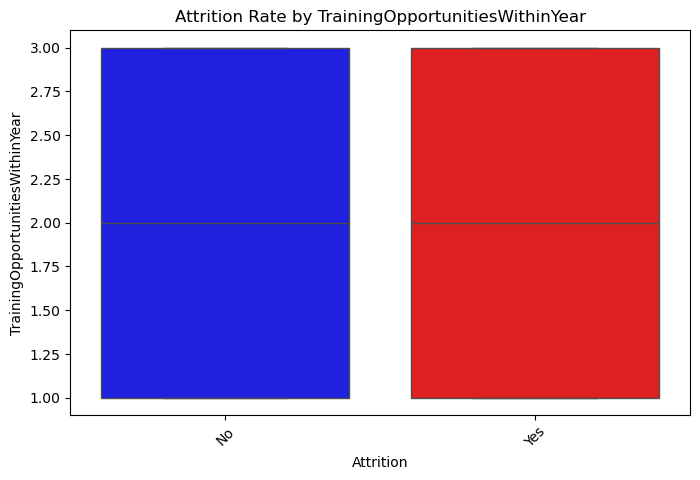

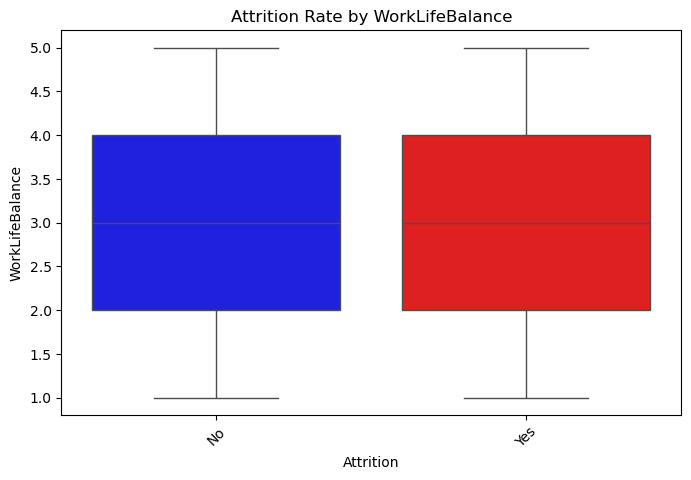

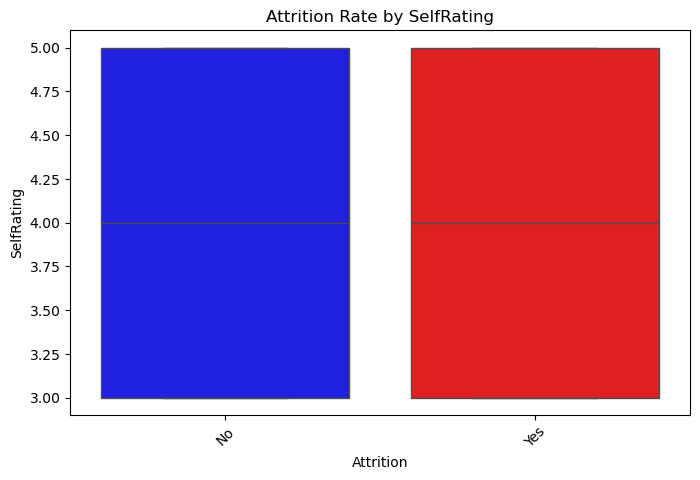

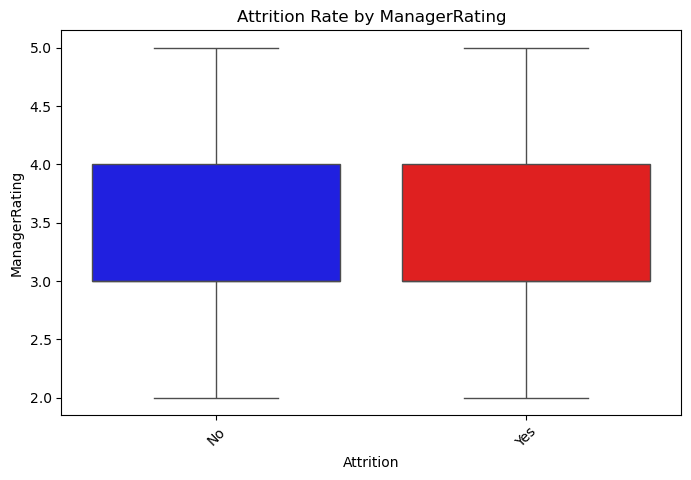

In [178]:
factors_Performance = ['EducationLevel', 'EnvironmentSatisfaction', 'JobSatisfaction', 'RelationshipSatisfaction', 'TrainingOpportunitiesWithinYear', 'WorkLifeBalance', 'SelfRating', 'ManagerRating']

for factor in factors_Performance:
    plt.figure(figsize=(8, 5))
    if final_data[factor].dtype == 'object':
        sns.countplot(x=final_data[factor], hue=final_data['Attrition'], palette={'Yes': 'red', 'No': 'blue'})
    else:
        sns.boxplot(x=final_data['Attrition'], y=final_data[factor], hue=final_data['Attrition'], palette={'Yes': 'red', 'No': 'blue'}, legend=False)
    plt.title(f"Attrition Rate by {factor}")
    plt.xticks(rotation=45)
    plt.show()

In [180]:
for factor in factors_Employees:
    if df_Employee[factor].dtype == 'object':
        contingency_table = pd.crosstab(df_Employee[factor], df_Employee['Attrition'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\n Chi-Square Test between {factor} and Attrition: p-value = {p:.5f}")
    else:
        resigned =df_Employee[df_Employee['Attrition'] == 'Yes'][factor]
        stayed = df_Employee[df_Employee['Attrition'] == 'No'][factor]
        t_stat, p_value = ttest_ind(resigned, stayed, equal_var=False)
        print(f"\n T-test between {factor} and Attrition: p-value = {p_value:.5f}")


 Chi-Square Test between Gender and Attrition: p-value = 0.16553

 T-test between Age and Attrition: p-value = 0.00000

 Chi-Square Test between BusinessTravel and Attrition: p-value = 0.00001

 Chi-Square Test between Department and Attrition: p-value = 0.00453

 T-test between DistanceFromHome (KM) and Attrition: p-value = 0.71392

 T-test between Education and Attrition: p-value = 0.22417

 Chi-Square Test between EducationField and Attrition: p-value = 0.00836

 Chi-Square Test between JobRole and Attrition: p-value = 0.00000

 Chi-Square Test between MaritalStatus and Attrition: p-value = 0.00000

 T-test between Salary and Attrition: p-value = 0.00000

 T-test between StockOptionLevel and Attrition: p-value = 0.00000

 Chi-Square Test between OverTime and Attrition: p-value = 0.00000

 T-test between YearsAtCompany and Attrition: p-value = 0.00000

 T-test between YearsInMostRecentRole and Attrition: p-value = 0.00000

 T-test between YearsSinceLastPromotion and Attrition: p-val

In [181]:
for factor in factors_Performance:
    if final_data[factor].dtype == 'object':
        contingency_table = pd.crosstab(final_data[factor], final_data['Attrition'])
        chi2, p, _, _ = chi2_contingency(contingency_table)
        print(f"\n Chi-Square Test between {factor} and Attrition: p-value = {p:.5f}")
    else:
        resigned =final_data[final_data['Attrition'] == 'Yes'][factor]
        stayed = final_data[final_data['Attrition'] == 'No'][factor]
        t_stat, p_value = ttest_ind(resigned, stayed, equal_var=False)
        print(f"\n T-test between {factor} and Attrition: p-value = {p_value:.5f}")


 Chi-Square Test between EducationLevel and Attrition: p-value = 0.00011

 T-test between EnvironmentSatisfaction and Attrition: p-value = 0.59624

 T-test between JobSatisfaction and Attrition: p-value = 0.27606

 T-test between RelationshipSatisfaction and Attrition: p-value = 0.42415

 T-test between TrainingOpportunitiesWithinYear and Attrition: p-value = 0.65275

 T-test between WorkLifeBalance and Attrition: p-value = 0.77856

 T-test between SelfRating and Attrition: p-value = 0.82346

 T-test between ManagerRating and Attrition: p-value = 0.53219


# Summary of Attrition Analysis - Key Findings & Influencing Factors

1️⃣ Overall Attrition Rate:

The attrition rate in the company is 16.12%, meaning that approximately 1 in every 6 employees leaves the organization.
While the rate is not excessively high, it highlights certain challenges in employee retention.

2️⃣ Key Influencing Factors Analyzed:

Statistical tests (T-tests and Chi-Square tests) were conducted to examine the relationship between attrition and a wide range of variables, including:

Demographics: Age, Gender, Marital Status

Job Attributes: Job Role, Department, Education Level, Education Field, Stock Option Level, Promotion history

Satisfaction and Engagement: Job Satisfaction, Environment Satisfaction, Relationship with Manager, Training Opportunities, Work-Life Balance

Compensation & Work Conditions: Salary, OverTime

Experience: Years at Company, Years in Current Role, Years Since Last Promotion, Years with Current Manager

Performance Measures: Manager Rating, Self-Rating

3️⃣ Notable Findings:

✅ Factors with a statistically significant relationship with attrition (p-value < 0.05):

Age, Job Role, Department, Education Field, Marital Status, Stock Option Level, Salary, OverTime

Years at Company, Years in Most Recent Role, Years Since Last Promotion, Years with Current Manager

→ These findings suggest that younger employees, those in certain roles (especially in Sales and Tech), employees with fewer stock options or lower salaries, and those with limited promotion opportunities are more likely to leave.

❌ Factors with no significant relationship (p-value ≥ 0.05):

Gender, Distance From Home, Education, Environment Satisfaction, Job Satisfaction, Work-Life Balance, Manager Rating, Self-Rating

→ While these factors showed no strong statistical association, they may still play indirect roles in attrition and shouldn’t be entirely dismissed.

4️⃣ Conclusion & Recommendations:

The most influential factors contributing to attrition include:
Salary, OverTime, Job Role, Department, Marital Status, Promotion Opportunities, and Tenure-related variables.

To help reduce the attrition rate, the company should:

🔹 Improve support for younger and less-tenured employees

🔹 Enhance reward systems and career advancement opportunities, particularly for long-term employees without promotions

🔹 Address overtime pressures and support better work-life balance

🔹 Develop targeted retention strategies for high-turnover roles and departments